# 1. SYSTEM & LIBRARY IMPORTS

In [103]:
import sys
import os
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Python Version:", sys.version)
print("NumPy Version:", np.__version__)

Python Version: 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]
NumPy Version: 2.2.6


# 2. LOADING DATASET

In [71]:
df = pd.read_csv(r"C:\Users\gasse\OneDrive\Desktop\student-mat-pass-or-fail.csv")
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass
0,1,1,18,1,0,0,4,4,2,2,...,3,4,1,1,3,6,5,6,6,0
1,1,1,17,1,0,1,1,1,1,2,...,3,3,1,1,3,4,5,5,6,0
2,1,1,15,1,1,1,1,1,1,2,...,3,2,2,3,3,10,7,8,10,1
3,1,1,15,1,0,1,4,2,1,3,...,2,2,1,1,5,2,15,14,15,1
4,1,1,16,1,0,1,3,3,1,2,...,3,2,1,2,5,4,6,10,10,1
5,1,0,16,1,1,1,4,3,1,2,...,4,2,1,2,5,10,15,15,15,1
6,1,0,16,1,1,1,2,2,1,2,...,4,4,1,1,3,0,12,12,11,1
7,1,1,17,1,0,0,4,4,2,2,...,1,4,1,1,1,6,6,5,6,0
8,1,0,15,1,1,0,3,2,1,2,...,2,2,1,1,1,0,16,18,19,1
9,1,0,15,1,0,1,3,4,1,2,...,5,1,1,1,5,0,14,15,15,1


# 3. DATA INSPECTION & CLEANING

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    int64
 1   sex         395 non-null    int64
 2   age         395 non-null    int64
 3   address     395 non-null    int64
 4   famsize     395 non-null    int64
 5   Pstatus     395 non-null    int64
 6   Medu        395 non-null    int64
 7   Fedu        395 non-null    int64
 8   traveltime  395 non-null    int64
 9   studytime   395 non-null    int64
 10  failures    395 non-null    int64
 11  schoolsup   395 non-null    int64
 12  famsup      395 non-null    int64
 13  paid        395 non-null    int64
 14  activities  395 non-null    int64
 15  nursery     395 non-null    int64
 16  higher      395 non-null    int64
 17  internet    395 non-null    int64
 18  romantic    395 non-null    int64
 19  famrel      395 non-null    int64
 20  freetime    395 non-null    int6

In [73]:
df.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.883544,0.526582,16.696203,0.777215,0.288608,0.896203,2.749367,2.521519,1.448101,2.035443,...,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,0.670886
std,0.321177,0.499926,1.276043,0.416643,0.453690,0.305384,1.094735,1.088201,0.697505,0.839240,...,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,0.470487
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,16.000000,1.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,0.000000
50%,1.000000,1.000000,17.000000,1.000000,0.000000,1.000000,3.000000,2.000000,1.000000,2.000000,...,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,1.000000
75%,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,2.000000,...,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,1.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,1.000000


In [74]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
pass          0
dtype: int64

# 4. FEATURE & TARGET SPLIT

In [94]:
X_clean = df.drop(columns=['pass', 'G3'])
y = df['pass']

# 5. TRAIN / TEST SPLIT


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y, test_size=0.2, random_state=42, stratify=y
)

model = DecisionTreeClassifier(
    max_depth=4,
    min_samples_leaf=10,
    random_state=42
)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8860759493670886

# 6. DECISION TREE MODEL

In [97]:
baseline_model = DecisionTreeClassifier(random_state=42)
baseline_model.fit(X_train, y_train)

y_pred = baseline_model.predict(X_test)
print("Baseline Accuracy:", accuracy_score(y_test, y_pred))

Baseline Accuracy: 0.8607594936708861


# 7. PIPELINE SETUP


In [98]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", DecisionTreeClassifier(random_state=42))
])

# 8. HYPERPARAMETER TUNING


In [99]:
param_grid = {
    "model__max_depth": [3, 5, 7, 10, None],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4],
    "model__criterion": ["gini", "entropy"]
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

Best Parameters: {'model__criterion': 'entropy', 'model__max_depth': 3, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
Best CV Accuracy: 0.9112599206349206


# 9. FINAL MODEL EVALUATION


In [100]:
best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)

print("Final Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Final Accuracy: 0.8734177215189873

Classification Report:

              precision    recall  f1-score   support

           0       0.72      1.00      0.84        26
           1       1.00      0.81      0.90        53

    accuracy                           0.87        79
   macro avg       0.86      0.91      0.87        79
weighted avg       0.91      0.87      0.88        79



# 10. CONFUSION MATRIX


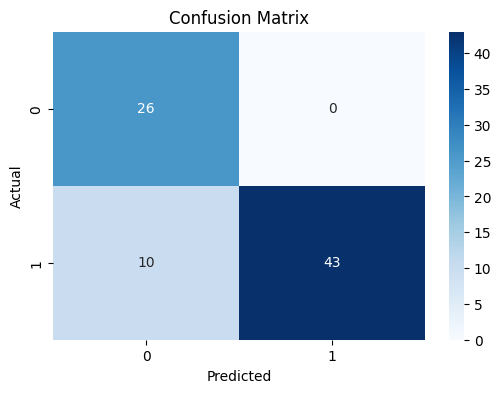

In [101]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 11. DECISION TREE VISUALIZATION


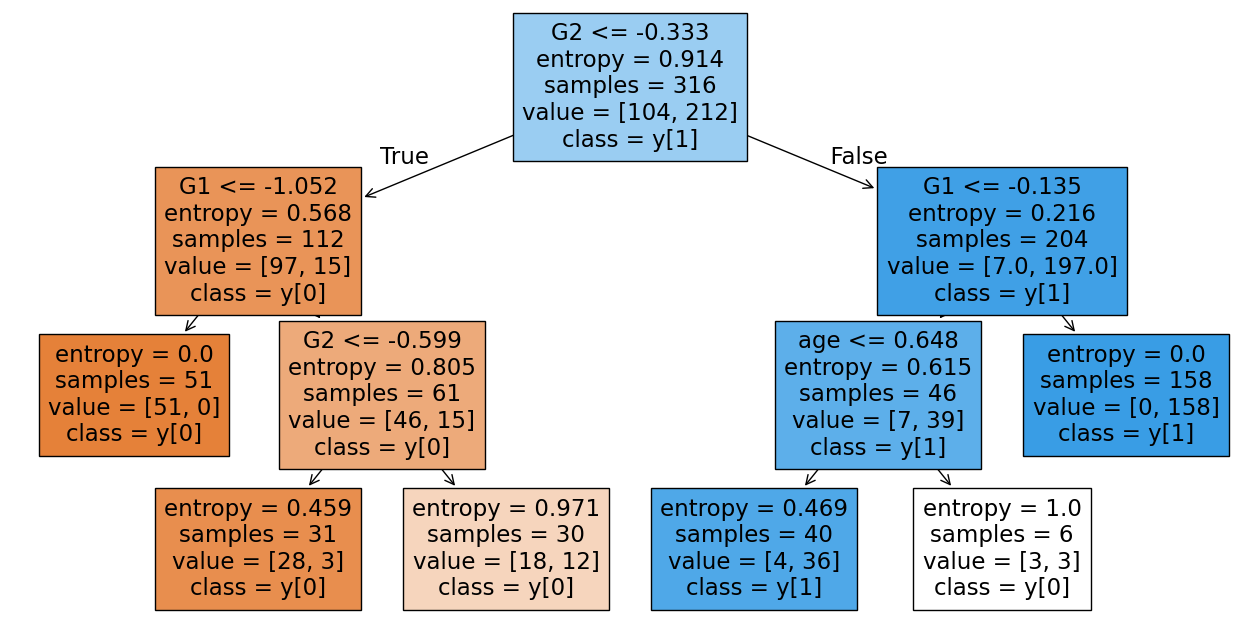

In [102]:
plt.figure(figsize=(16,8))
plot_tree(
    best_model.named_steps["model"],
    filled=True,
    feature_names=X.columns,
    class_names=True
)
plt.show()

# 12. Random Forest Model


In [104]:
rf_model = RandomForestClassifier(
    n_estimators=100,     # number of trees
    max_depth=None,       # allow full depth
    min_samples_leaf=1,
    random_state=42
)

#  TRAINING THE MODEL


In [105]:
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# PREDICTION 

In [106]:
y_pred_rf = rf_model.predict(X_test)

# EVALUATING THE MODEL

In [107]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8734177215189873

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.75      0.92      0.83        26
           1       0.96      0.85      0.90        53

    accuracy                           0.87        79
   macro avg       0.85      0.89      0.86        79
weighted avg       0.89      0.87      0.88        79



# CONFUSION MATRIX


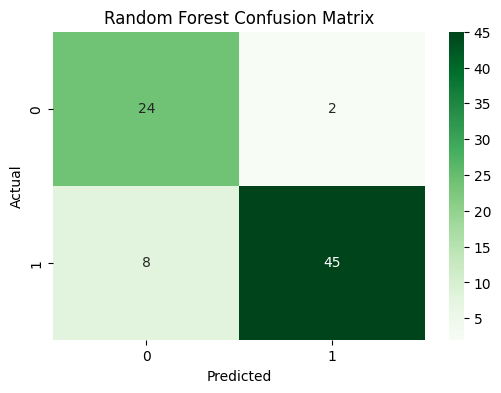

In [108]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()